In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## LOADING DATASET

In [3]:
df = pd.read_csv("zomato.csv")
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
df.shape

(51717, 17)

In [5]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [7]:
df.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [8]:
df.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [9]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [10]:
df = df.drop(['url','phone'], axis=1)

In [11]:
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [12]:
df.duplicated().sum()

43

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.duplicated().sum()

0

In [15]:
df.isnull().sum()

address                            0
name                               0
online_order                       0
book_table                         0
rate                            7767
votes                              0
location                          21
rest_type                        227
dish_liked                     28047
cuisines                          45
approx_cost(for two people)      345
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [16]:
df.dropna(how = 'any', inplace=True)
df.isnull().sum()

address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
menu_item                      0
listed_in(type)                0
listed_in(city)                0
dtype: int64

In [17]:
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [18]:
df = df.rename(columns = {'approx_cost(for two people)':'cost','listed_in(type)':'type', 'listed_in(city)':'city' })
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'dish_liked', 'cuisines', 'cost',
       'reviews_list', 'menu_item', 'type', 'city'],
      dtype='object')

In [19]:
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [20]:
df['cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '750', '200', '850', '1,200', '150', '350', '250', '1,500',
       '1,300', '1,000', '100', '900', '1,100', '1,600', '950', '230',
       '1,700', '1,400', '1,350', '2,200', '2,000', '1,800', '1,900',
       '180', '330', '2,500', '2,100', '3,000', '2,800', '3,400', '40',
       '1,250', '3,500', '4,000', '2,400', '1,450', '3,200', '6,000',
       '1,050', '4,100', '2,300', '120', '2,600', '5,000', '3,700',
       '1,650', '2,700', '4,500'], dtype=object)

In [21]:
df['cost'] = df['cost'].apply(lambda x: x.replace(',',''))
df['cost'] = df['cost'].str.replace(' ','')
print(df['cost'].unique())

['800' '300' '600' '700' '550' '500' '450' '650' '400' '750' '200' '850'
 '1200' '150' '350' '250' '1500' '1300' '1000' '100' '900' '1100' '1600'
 '950' '230' '1700' '1400' '1350' '2200' '2000' '1800' '1900' '180' '330'
 '2500' '2100' '3000' '2800' '3400' '40' '1250' '3500' '4000' '2400'
 '1450' '3200' '6000' '1050' '4100' '2300' '120' '2600' '5000' '3700'
 '1650' '2700' '4500']


In [22]:
df['cost'] = df['cost'].astype('float')
print(df['cost'].unique())

[ 800.  300.  600.  700.  550.  500.  450.  650.  400.  750.  200.  850.
 1200.  150.  350.  250. 1500. 1300. 1000.  100.  900. 1100. 1600.  950.
  230. 1700. 1400. 1350. 2200. 2000. 1800. 1900.  180.  330. 2500. 2100.
 3000. 2800. 3400.   40. 1250. 3500. 4000. 2400. 1450. 3200. 6000. 1050.
 4100. 2300.  120. 2600. 5000. 3700. 1650. 2700. 4500.]


In [23]:
df['rate'].unique()
df = df.loc[df.rate != 'NEW']
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '4.6/5', '4.0/5', '4.2/5', '3.9/5',
       '3.0/5', '3.6/5', '2.8/5', '4.4/5', '3.1/5', '4.3/5', '2.6/5',
       '3.3/5', '3.5/5', '3.8 /5', '3.2/5', '4.5/5', '2.5/5', '2.9/5',
       '3.4/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5', '4.8/5',
       '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5', '2.9 /5', '2.7 /5',
       '2.5 /5', '2.6 /5', '4.5 /5', '4.3 /5', '3.7 /5', '4.4 /5',
       '4.9/5', '2.1/5', '2.0/5', '1.8/5', '3.4 /5', '3.6 /5', '3.3 /5',
       '4.6 /5', '4.9 /5', '3.2 /5', '3.0 /5', '2.8 /5', '3.5 /5',
       '3.1 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5', '2.1 /5',
       '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [24]:
df['rate'] = df['rate'].str.replace('/5','')
df['rate'] = df['rate'].astype('float')
df['rate'].unique()

array([4.1, 3.8, 3.7, 4.6, 4. , 4.2, 3.9, 3. , 3.6, 2.8, 4.4, 3.1, 4.3,
       2.6, 3.3, 3.5, 3.2, 4.5, 2.5, 2.9, 3.4, 2.7, 4.7, 2.4, 2.2, 2.3,
       4.8, 4.9, 2.1, 2. , 1.8])

In [25]:
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'dish_liked', 'cuisines', 'cost',
       'reviews_list', 'menu_item', 'type', 'city'],
      dtype='object')

## Exploratory Data Analysis

# Top 20 most famous chains in Bangalore

In [26]:
chain = df['name'].value_counts()[:10]
print(chain)

Onesta                    85
Empire Restaurant         67
KFC                       59
McDonald's                57
Pizza Hut                 56
Domino's Pizza            55
Smally's Resto Cafe       54
Faasos                    54
Corner House Ice Cream    52
Burger King               51
Name: name, dtype: int64


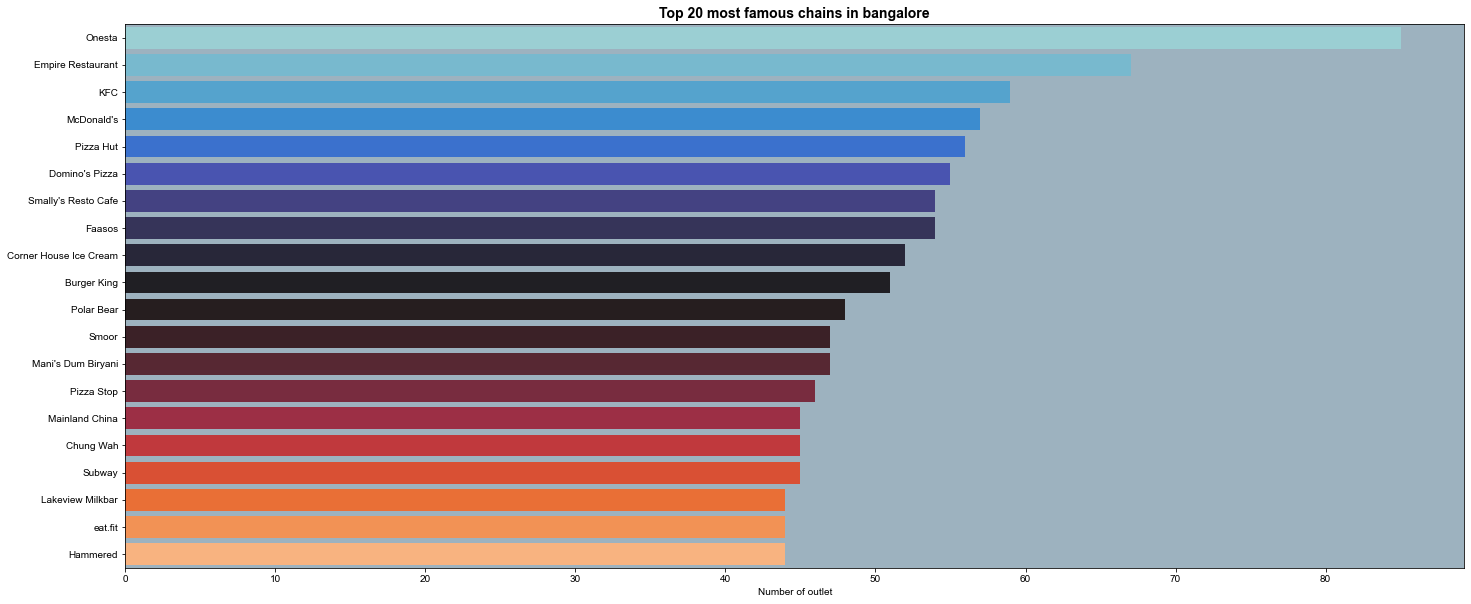

In [27]:
plt.figure(figsize=(24,10))
ax = plt.axes()
ax = ax.set(facecolor = '#9DB2BF')
chain=df['name'].value_counts()[:20]

sns.barplot(x=chain,y=chain.index, orient='h',palette="icefire",saturation=1)
sns.set(rc={'figure.figsize':(10,8)},style='darkgrid')
plt.title("Top 20 most famous chains in bangalore", fontdict={'fontweight':'bold', 'fontsize':14})
plt.xlabel('Number of outlet', fontsize=10)

plt.show()

# Restaurants delivering online

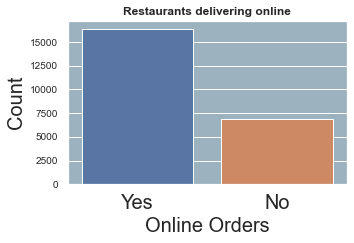

In [28]:
plt.figure(figsize=(5,3))
ax = plt.axes()
ax = ax.set(facecolor = '#9DB2BF')

sns.countplot(df['online_order'])
plt.xticks(fontsize=20)
plt.yticks(fontsize=10)
plt.xlabel('Online Orders',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.title('Restaurants delivering online',fontsize=12,fontweight="bold")
plt.show()

# Restaurants allowing table booking or not 

In [29]:
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'dish_liked', 'cuisines', 'cost',
       'reviews_list', 'menu_item', 'type', 'city'],
      dtype='object')

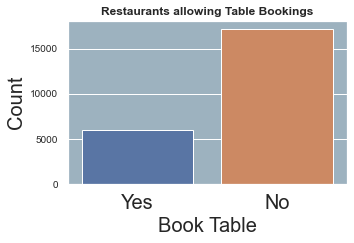

In [30]:
plt.figure(figsize=(5,3))
ax = plt.axes()
ax = ax.set(facecolor = '#9DB2BF')

sns.countplot(df['book_table'])
plt.xticks(fontsize=20)
plt.yticks(fontsize=10)
plt.xlabel('Book Table',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.title('Restaurants allowing Table Bookings',fontsize=12,fontweight="bold")
plt.show()

# Count Plot of Various Location

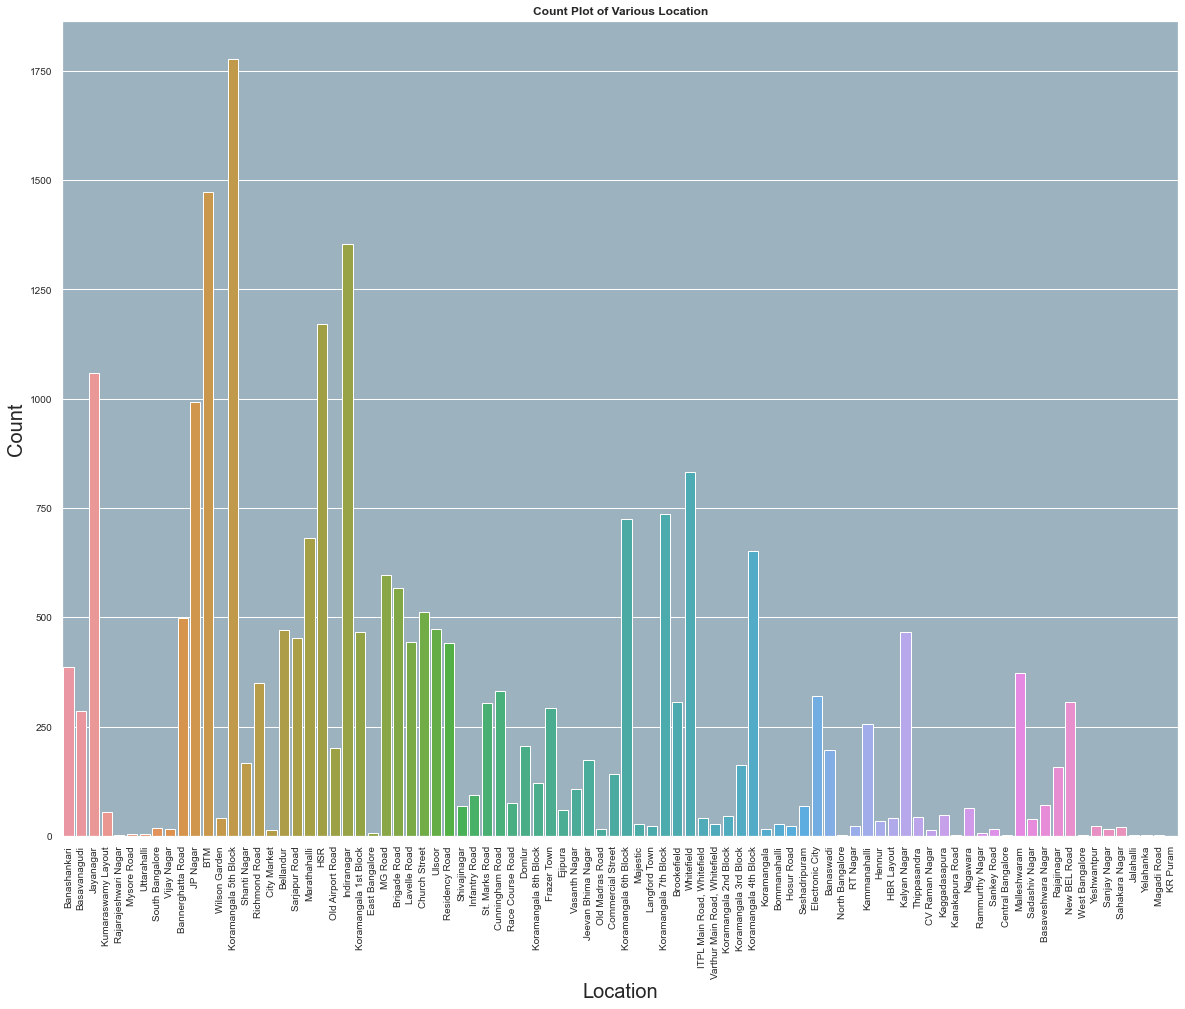

In [31]:
plt.figure(figsize=(20,15))
ax = plt.axes()
ax = ax.set(facecolor = '#9DB2BF')

sns.countplot(df['location'])
plt.xticks(rotation = 90, fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Location',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.title('Count Plot of Various Location',fontsize=12,fontweight="bold")
plt.show()

# City wise count for restaurant

In [32]:
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'dish_liked', 'cuisines', 'cost',
       'reviews_list', 'menu_item', 'type', 'city'],
      dtype='object')

In [33]:
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [34]:
locations = df['location'].value_counts()
print(locations)

Koramangala 5th Block    1776
BTM                      1472
Indiranagar              1355
HSR                      1170
Jayanagar                1060
                         ... 
Yelahanka                   2
Kanakapura Road             2
West Bangalore              2
Rajarajeshwari Nagar        2
KR Puram                    1
Name: location, Length: 88, dtype: int64


In [35]:
print(df['city'].value_counts())

BTM                      1417
Koramangala 7th Block    1381
Koramangala 4th Block    1348
Koramangala 5th Block    1311
Koramangala 6th Block    1253
Jayanagar                1057
Indiranagar              1015
MG Road                  1006
Church Street             982
Brigade Road              969
Lavelle Road              894
Residency Road            843
JP Nagar                  817
Old Airport Road          757
HSR                       743
Whitefield                632
Marathahalli              620
Basavanagudi              603
Brookefield               600
Frazer Town               545
Bannerghatta Road         543
Kammanahalli              532
Kalyan Nagar              518
Bellandur                 507
Sarjapur Road             503
Malleshwaram              498
Rajajinagar               378
Banashankari              373
Electronic City           319
New BEL Road              284
Name: city, dtype: int64


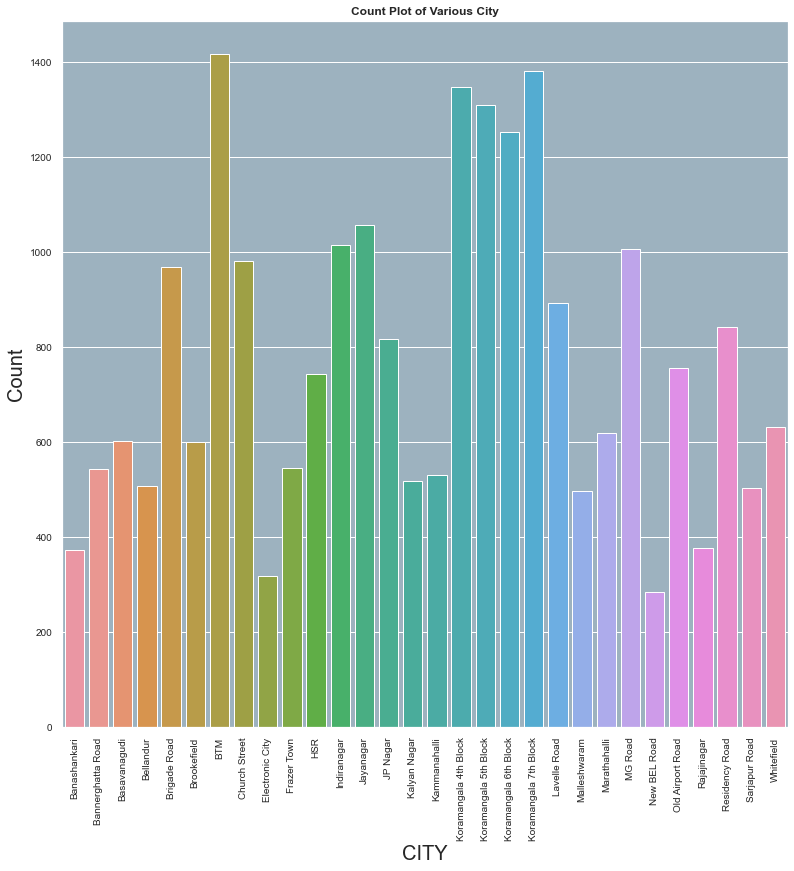

In [36]:
plt.figure(figsize=(13,13))
ax = plt.axes()
ax = ax.set(facecolor = '#9DB2BF')

sns.countplot(df['city'])
plt.xticks(rotation = 90, fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('CITY',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.title('Count Plot of Various City',fontsize=12,fontweight="bold")
plt.show()

# Online order Vs Rate

In [37]:
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'dish_liked', 'cuisines', 'cost',
       'reviews_list', 'menu_item', 'type', 'city'],
      dtype='object')

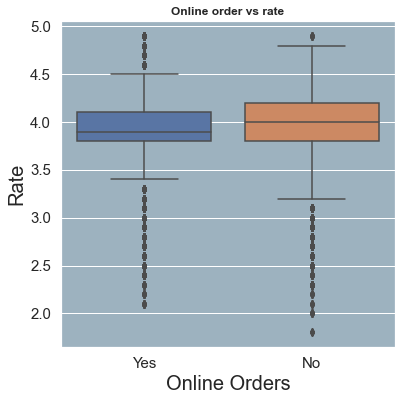

In [38]:
plt.figure(figsize=(6,6))
ax = plt.axes()
ax = ax.set(facecolor = '#9DB2BF')

sns.boxplot(x = 'online_order', y = 'rate', data = df)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Online Orders',fontsize=20)
plt.ylabel('Rate',fontsize=20)
plt.title('Online order vs rate',fontsize=12,fontweight="bold")
plt.show()

# Best Location vs Rate

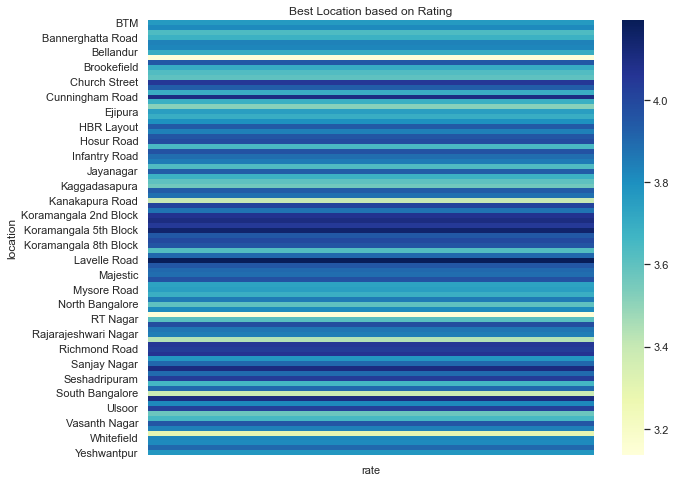

In [39]:
location_rating = df.groupby('location')['rate'].mean().reset_index()
heatmap_data = pd.pivot_table(location_rating, values='rate', index='location')
sns.heatmap(heatmap_data, cmap='YlGnBu')
plt.title('Best Location based on Rating')
plt.show()

# Rate Density

<AxesSubplot:xlabel='rate', ylabel='Density'>

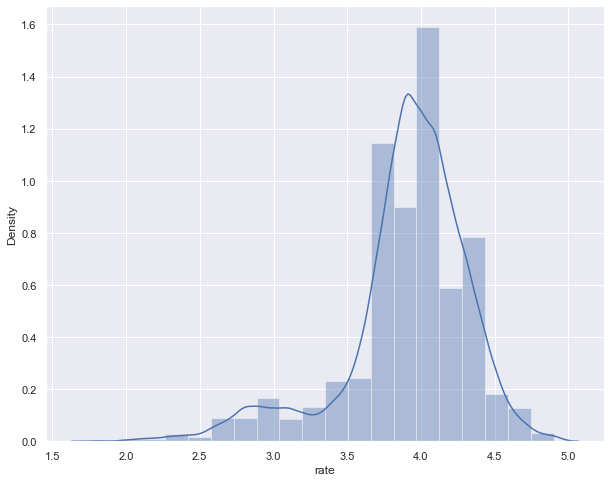

In [40]:
sns.distplot(df['rate'], bins=20)

# Service Type

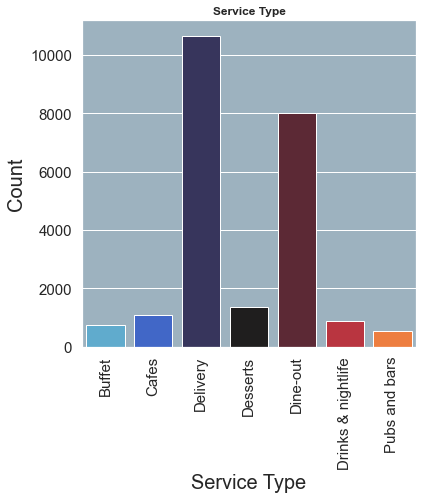

In [41]:
plt.figure(figsize=(6,6))
ax = plt.axes()
ax = ax.set(facecolor = '#9DB2BF')

sns.countplot(df['type'],orient = 'h', palette="icefire",saturation=1)
plt.xticks(rotation = 90, fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Service Type',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.title('Service Type',fontsize=12,fontweight="bold")
sns.set(rc={'figure.figsize':(10,8)},style='darkgrid')
plt.show()

# Cost Density

<AxesSubplot:xlabel='cost', ylabel='Density'>

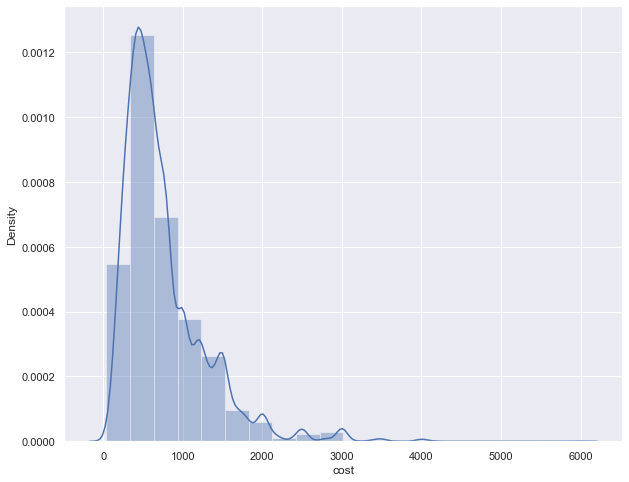

In [42]:
sns.distplot(df['cost'], bins=20)

# Restaurants type

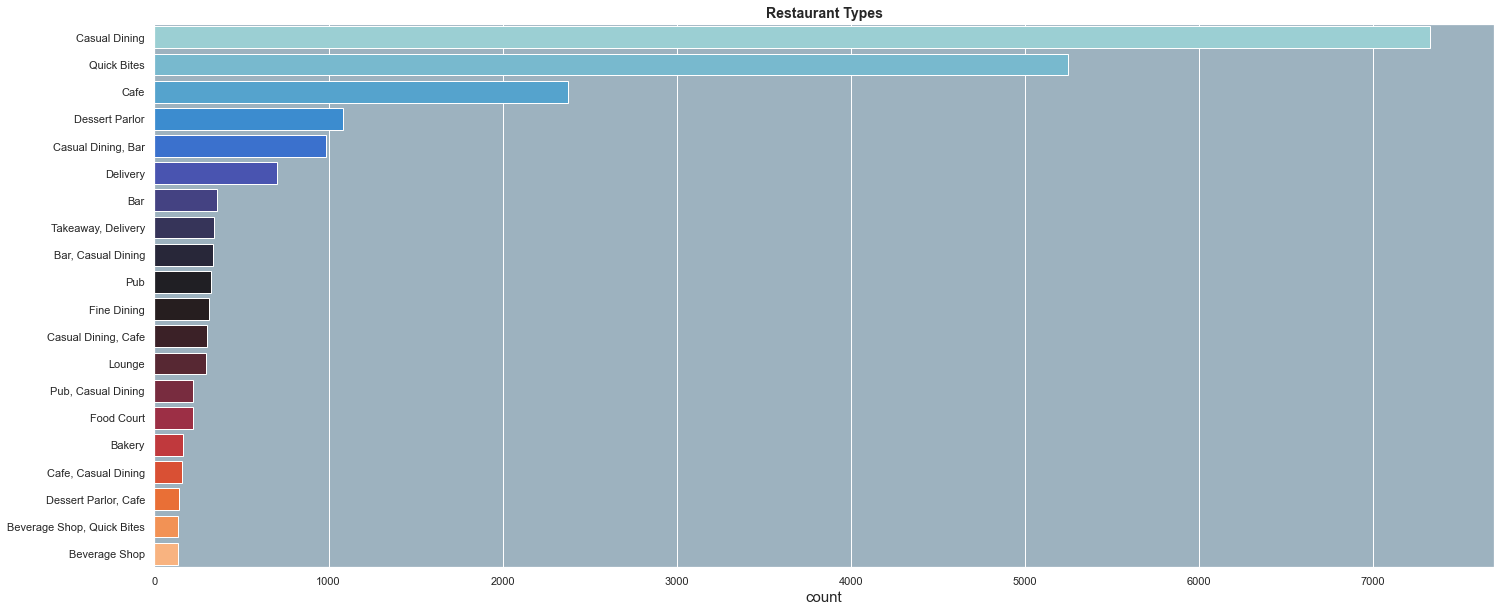

In [43]:
plt.figure(figsize=(24,10))
ax = plt.axes()
ax = ax.set(facecolor = '#9DB2BF')
chain1=df['rest_type'].value_counts()[:20]

sns.barplot(x=chain1,y=chain1.index, orient='h',palette="icefire",saturation=1)
sns.set(rc={'figure.figsize':(10,8)},style='darkgrid')
plt.title("Restaurant Types", fontdict={'fontweight':'bold', 'fontsize':14})
plt.xlabel('count', fontsize=15)

plt.show()

# Dish Liked

In [44]:
import re
df.index=range(df.shape[0])
likes=[]
for i in range(df.shape[0]):
    array=re.split(',',df['dish_liked'][i])
    for item in array:
        likes.append(item)

In [45]:
favfood=pd.Series(likes).value_counts()[:20]
print(favfood)

 Pasta              2692
 Pizza              1915
 Cocktails          1880
 Burgers            1736
 Mocktails          1623
 Biryani            1307
 Sandwiches         1287
Burgers             1256
 Coffee             1184
 Nachos             1170
 Fish               1116
 Paratha            1107
 Salads             1055
 Chicken Biryani    1004
Cocktails            891
 Fries               876
 Noodles             854
 Beer                835
 Mutton Biryani      832
 Tea                 819
dtype: int64


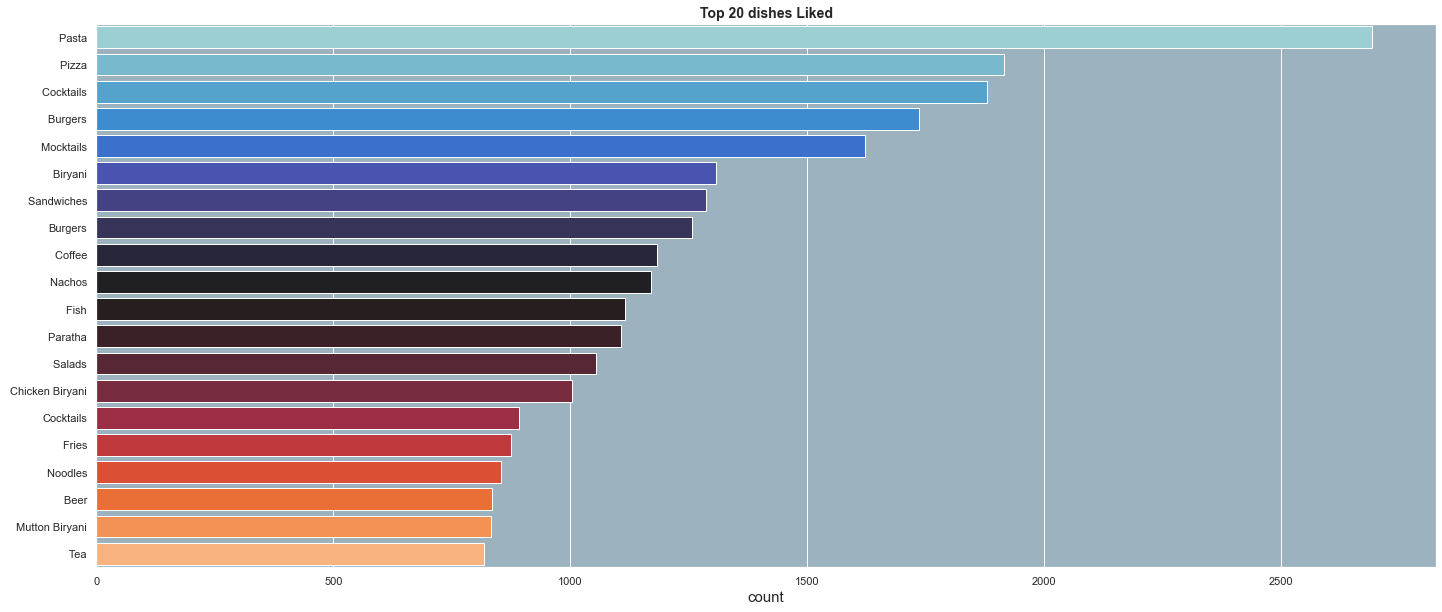

In [46]:
plt.figure(figsize=(24,10))
ax = plt.axes()
ax = ax.set(facecolor = '#9DB2BF')

sns.barplot(x=favfood,y=favfood.index, orient='h',palette="icefire",saturation=1)
sns.set(rc={'figure.figsize':(10,8)},style='darkgrid')
plt.title("Top 20 dishes Liked", fontdict={'fontweight':'bold', 'fontsize':14})
plt.xlabel('count', fontsize=15)

plt.show()

# TRAIN TEST SPLITTING


In [47]:
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [48]:
df.book_table[df.book_table=='Yes']=1
df.book_table[df.book_table=='No']=0
df.book_table.value_counts()

0    17191
1     6057
Name: book_table, dtype: int64

In [49]:
df.book_table = pd.to_numeric(df.book_table)
df.book_table

0        1
1        0
2        0
3        0
4        0
        ..
23243    1
23244    0
23245    0
23246    0
23247    1
Name: book_table, Length: 23248, dtype: int64

In [51]:
df.online_order[df.online_order=='Yes']=1
df.online_order[df.online_order=='No']=0
df.online_order.value_counts()

1    16378
0     6870
Name: online_order, dtype: int64

In [52]:
df.online_order=pd.to_numeric(df.online_order)
df.online_order

0        1
1        1
2        1
3        0
4        0
        ..
23243    1
23244    0
23245    0
23246    0
23247    0
Name: online_order, Length: 23248, dtype: int64

In [54]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'cost'],
      dtype='object')

In [68]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost
0,Jalsa,1,1,4.1,775,1,20,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...",1386,800.0
1,Spice Elephant,1,0,4.1,787,1,20,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...",594,800.0
2,San Churro Cafe,1,0,3.8,918,1,16,"Churros, Cannelloni, Minestrone Soup, Hot Choc...",484,800.0
3,Addhuri Udupi Bhojana,0,0,3.7,88,1,62,Masala Dosa,1587,300.0
4,Grand Village,0,0,3.8,166,4,20,"Panipuri, Gol Gappe",1406,600.0


In [69]:
X = df.iloc[:, [1,2,4,5,6,8,9]]
X.head(10)

,online_order,book_table,votes,location,rest_type,cuisines,cost
0,1,1,775,1,20,1386,800.0
1,1,0,787,1,20,594,800.0
2,1,0,918,1,16,484,800.0
3,0,0,88,1,62,1587,300.0
4,0,0,166,4,20,1406,600.0
5,1,0,286,4,20,1156,600.0
6,1,1,2556,1,22,1468,600.0
7,1,0,324,1,13,462,700.0
8,1,0,504,1,13,485,550.0
9,1,0,402,1,13,332,500.0


In [70]:
y = df['rate']
y.head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 10)

## Model selection

# Linear regression

In [93]:
from sklearn.metrics import r2_score 
from sklearn.linear_model import LinearRegression
lr_model=LinearRegression()
lr_model.fit(X_train,y_train)
y_pred=lr_model.predict(X_test)
score1 = r2_score(y_test,y_predict)
print(score1)

0.8986829623442857


# Random Forest

In [94]:
from sklearn.ensemble import RandomForestRegressor
RF_Model=RandomForestRegressor(n_estimators=650,random_state=245,min_samples_leaf=.0001)
RF_Model.fit(X_train,y_train)
y_predict=RF_Model.predict(X_test)
score2 = r2_score(y_test,y_predict)
print(score2)

0.8986829623442857


# Extra tree Regressor

In [95]:
from sklearn.ensemble import  ExtraTreesRegressor
ET_Model=ExtraTreesRegressor(n_estimators = 120)
ET_Model.fit(X_train,y_train)
y_predict=ET_Model.predict(X_test)
score3 = r2_score(y_test,y_predict)
print(score3)

0.9456488327973617


# SVR

In [96]:
from sklearn.svm import SVR
svm = SVR()
svm.fit(X_train,y_train)
y_predict=svm.predict(X_test)
score4 = r2_score(y_test,y_predict)
print(score4)

0.28835969697385677


# Gradient Boosting

In [97]:
from sklearn.ensemble import GradientBoostingRegressor
gr = GradientBoostingRegressor()
gr.fit(X_train,y_train)
y_predict=gr.predict(X_test)
score5 = r2_score(y_test,y_predict)
print(score5)

0.4357999933011607


### EVALUATION OF ALGORITHMS

In [98]:
final_Data = pd.DataFrame({'Models':['LR', 'RF', 'ET' ,'SVR','GR'],'R2_SCORE':[score1,score2,score3,score4,score5]})
final_Data

,Models,R2_SCORE
0,LR,0.898683
1,RF,0.898683
2,ET,0.945649
3,SVR,0.288360
4,GR,0.435800


<AxesSubplot:xlabel='Models', ylabel='R2_SCORE'>

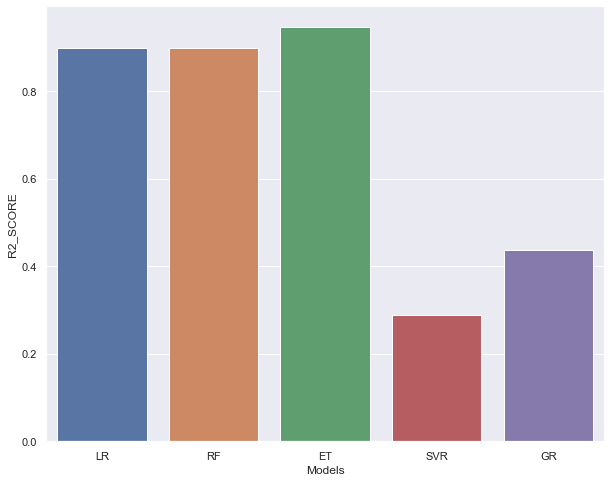

In [99]:
import seaborn as sns
sns.barplot(final_Data['Models'],final_Data['R2_SCORE'])

# Save the model

In [100]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'cost'],
      dtype='object')

In [104]:
X = df.iloc[:, [1,2,4,5,6,8,9]]
y = df['rate']

In [106]:
ET_Model=ExtraTreesRegressor(n_estimators = 120)
ET_Model.fit(X,y)

ExtraTreesRegressor(n_estimators=120)

In [107]:
import joblib
joblib.dump(gr, 'Restaurant rating prediction model')

model = joblib.load('Restaurant rating prediction model')

In [108]:
import pickle
# # Saving model to disk
pickle.dump(ET_Model, open('Restaurant rating prediction model.pkl','wb'))
model=pickle.load(open('Restaurant rating prediction model.pkl','rb'))
print(y_predict)

[4.21022733 3.78995289 3.7324445  ... 3.46926835 3.93677478 4.02421176]
